# PASCAL VOC DataLoader

## 1. Prepare PASCAL VOC2007 dataset.

In [ ]:
!wget --load-cookies ~/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies ~/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1FSPPvm6-QZ43pCYzPA3-pyN7RZ0rq5DT' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1FSPPvm6-QZ43pCYzPA3-pyN7RZ0rq5DT" -O VOC2007.zip && rm -rf ~/cookies.txt

--2023-06-27 11:55:12--  https://docs.google.com/uc?export=download&confirm=t&id=1FSPPvm6-QZ43pCYzPA3-pyN7RZ0rq5DT
Resolving docs.google.com (docs.google.com)... 64.233.188.102, 64.233.188.101, 64.233.188.139, ...
Connecting to docs.google.com (docs.google.com)|64.233.188.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-1k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fdct6096tsub7ep834otho1faoa3ass7/1687866900000/16525786242263481678/*/1FSPPvm6-QZ43pCYzPA3-pyN7RZ0rq5DT?e=download&uuid=a21f67af-9bf7-442c-a589-be49525b3884 [following]
--2023-06-27 11:55:13--  https://doc-04-1k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fdct6096tsub7ep834otho1faoa3ass7/1687866900000/16525786242263481678/*/1FSPPvm6-QZ43pCYzPA3-pyN7RZ0rq5DT?e=download&uuid=a21f67af-9bf7-442c-a589-be49525b3884
Resolving doc-04-1k-docs.googleusercontent.com (doc-04-1k-docs.googleusercontent.com)... 64.233.188.132, 

In [ ]:
import zipfile
with zipfile.ZipFile('VOC2007.zip', 'r')as f:
    f.extractall('./')

!rm -rf VOC2007.zip
!rm -rf __MACOSX

## 2. Import packages.

In [ ]:
import os

import numpy as np
import torch.utils.data as data
### Import xml tree library
import xml.etree.ElementTree as ET
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [ ]:
### Define 20 classes + background
VOC2007_CLASSES = (
    '__background__',
    'aeroplane', 'bicycle', 'bird', 'boat',
    'bottle', 'bus', 'car', 'cat', 'chair',
    'cow', 'diningtable', 'dog', 'horse',
    'motorbike', 'person', 'pottedplant',
    'sheep', 'sofa', 'train', 'tvmonitor'
)

### Define bbox color
VOC2007_COLORS = [
    [0.,        0.,        0.       ],
 [0.5019608, 0.,        0.       ],
 [0.,        0.5019608, 0.       ],
 [0.5019608, 0.5019608, 0.       ],
 [0.,        0.,        0.5019608],
 [0.5019608, 0.,        0.5019608],
 [0.,        0.5019608, 0.5019608],
 [0.5019608, 0.5019608, 0.5019608],
 [0.2509804, 0.,        0.       ],
 [0.7529412, 0.,        0.       ],
 [0.2509804, 0.5019608, 0.       ],
 [0.7529412, 0.5019608, 0.       ],
 [0.2509804, 0.,        0.5019608],
 [0.7529412, 0.,        0.5019608],
 [0.2509804, 0.5019608, 0.5019608],
 [0.7529412, 0.5019608, 0.5019608],
 [0.,        0.2509804, 0.       ],
 [0.5019608, 0.2509804, 0.       ],
 [0.,        0.7529412, 0.       ],
 [0.5019608, 0.7529412, 0.       ],
 [0.,        0.2509804, 0.5019608]]

## 3. Load an annotation file (working with a XML file).

In [ ]:
### Parse xml file
sample_idx = 1
filename = os.path.join(f'./VOC2007/Annotations/{sample_idx:06d}.xml')
tree = ET.parse(filename)

In [ ]:
### Explore xml file
root = tree.getroot()
print("root.tag:", root.tag)
for node in root:
    print(">>>>", node.tag)
print('\n')

print("node.tag:", node.tag)
for node2 in node:  ### Iterate the final object
    print(f">>>> {node2.tag}: {node2.text}")
print("\n")

print("node2.tag:", node2.tag)
for node3 in node2: ### Iterate the final bndbox (bounding box)
    print(f">>>> {node3.tag}: {node3.text}")

root.tag: annotation
>>>> folder
>>>> filename
>>>> source
>>>> owner
>>>> size
>>>> segmented
>>>> object
>>>> object


node.tag: object
>>>> name: person
>>>> pose: Left
>>>> truncated: 1
>>>> difficult: 0
>>>> bndbox: 
			


node2.tag: bndbox
>>>> xmin: 8
>>>> ymin: 12
>>>> xmax: 352
>>>> ymax: 498


### 3-1. Find all objects

In [ ]:
#Find all tags named 'object'
objs = tree.findall('object')
num_objs = len(objs)
print("the number of objects:", num_objs)
print("objs:", objs) # List[Element]

for obj_idx, obj in enumerate(objs):
    for node in obj:
        print(f">>>> {obj_idx}th {node.tag}: {node.text}")
        for node2 in node:
            print(f">>>> {obj_idx}th bounding box's {node2.tag}: {node2.text}")
    print("")

the number of objects: 2
objs: [<Element 'object' at 0x7f0408c38130>, <Element 'object' at 0x7f0408c38310>]
>>>> 0th name: dog
>>>> 0th pose: Left
>>>> 0th truncated: 1
>>>> 0th difficult: 0
>>>> 0th bndbox: 
			
>>>> 0th bounding box's xmin: 48
>>>> 0th bounding box's ymin: 240
>>>> 0th bounding box's xmax: 195
>>>> 0th bounding box's ymax: 371

>>>> 1th name: person
>>>> 1th pose: Left
>>>> 1th truncated: 1
>>>> 1th difficult: 0
>>>> 1th bndbox: 
			
>>>> 1th bounding box's xmin: 8
>>>> 1th bounding box's ymin: 12
>>>> 1th bounding box's xmax: 352
>>>> 1th bounding box's ymax: 498



### 3-2. Obtain bounding boxes as np.ndarray.

In [ ]:
boxes = np.zeros((num_objs, 4), dtype=np.int32)
classes = []
for obj_idx, obj in enumerate(objs):
    ###Get bounding boxes
    bbox = obj.find('bndbox')
    x1 = float(bbox.find('xmin').text) - 1 ### Correct coordinates
    y1 = float(bbox.find('ymin').text) - 1
    x2 = float(bbox.find('xmax').text) - 1
    y2 = float(bbox.find('ymax').text) - 1
    boxes[obj_idx, :] = [x1, y1, x2, y2]

    ###Get Categories
    object_class = obj.find('mnae').text ### class name as string
    classes.append(object_class)

print(boxes)
print(classes)

[[ 47 239 194 370]
 [  7  11 351 497]]
['dog', 'person']


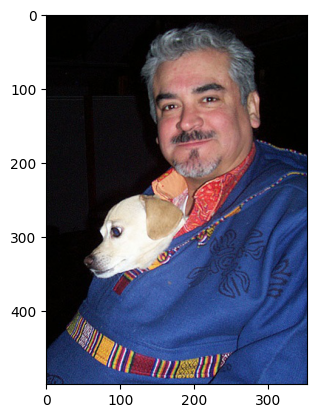

In [ ]:
img = Image.open(f'./VOC2007/JPEGImages/{sample_idx:06d}.jpg')
fig, ax = plt.subplots(1)
ax.imshow(img)
plt.show()

In [ ]:
def draw_bb(img, boxes, classes, red_only=False):
    fig,ax = plt.subplots(1)
    for box, class_ in zip(boxes, classes):
        rect = patches.Rectangle(
            ( , ), ### implement here (hint: the upper left point (minx, miny)_
            , ### implement here (hint: delta_x: width)
            , ### implement here (hint: delta_y: height)
            linewidth=3, ### line thickness
            edgecolor='r' if red_only else VOC2007_COLORS[VOC2007_CLASSES.index(class_)],
            facecolor='none'
        )
        ax.add_patch(rect)
    ax.imshow(img)
    plt.show()

draw_bb(img, boxes, classes, False)

## 4. Define PASCAL VOC2007 dataset.

In [ ]:
class PASCAL_DATASET(data.Dataset):
    def __init__(self, data_root, img_list_file):
        self.data_root = data_root
        self.img_list = []
        self._load_img_name_list(img_list_file)

    ### Open file of image name list and save each image name
    def _load_img_name_list(self, img_list_file):
        with open(img_list_file) as f:
            self.img_list = f.read().splitlines()

    def _load_annotation(self, img_path):
        filename = os.path.join(self.data_root, 'Annotations', img_path + '.xml')
        tree = ET.parse(filename)
        objs = tree.findall('object')
        num_objs = len(objs)
        boxes = np.zeros((num_objs, 4), dtype=np.int32)
        gt_classes_str = []

        for ix, obj in enumerate(objs):
            bbox = obj.find('bndbox')
            # Make pixel indexes 0-based
            x1 = float(bbox.find('xmin').text) - 1
            y1 = float(bbox.find('ymin').text) - 1
            x2 = float(bbox.find('xmax').text) - 1
            y2 = float(bbox.find('ymax').text) - 1
            gt_classes_str.append(obj.find('name').text)
            boxes[ix, :] = [x1, y1, x2, y2]

        return boxes, gt_classes_str

    def __len__(self,):
        return len(self.img_list)

    ### __getitem__ is executed when accessing index
    def __getitem__(self, index):
        img_path = self.img_list[index]
        img = Image.open(os.path.join(self.data_root, 'JPEGImages', img_path + '.jpg'))
        boxes, gt_classes_str = self._load_annotation(img_path)
        return img, boxes, gt_classes_str

In [ ]:
pascal_data = PASCAL_DATASET('./VOC2007','./VOC2007/ImageSets/Main/train.txt')

In [ ]:
len(pascal_data)

2501

In [ ]:
# pascal_it = iter(pascal_data)
# first_data = next(pascal_it)
first_data = pascal_data[0]

In [ ]:
print(first_data)
print(first_data[0])
print(first_data[1])
print(first_data[2])

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333 at 0x7F0408BD50F0>, array([[155,  96, 350, 269]], dtype=int32), ['car'])
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333 at 0x7F0408BD50F0>
[[155  96 350 269]]
['car']


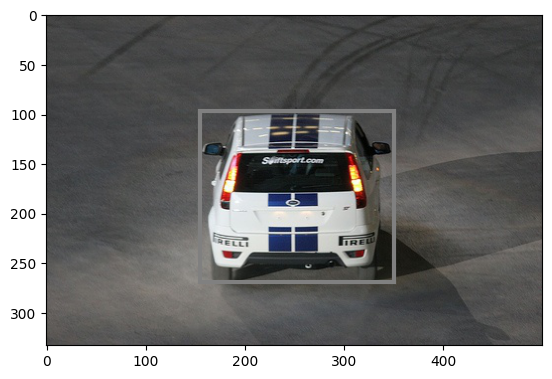

In [ ]:
draw_bb() ## implement here (hint: def draw_bb(img, boxes, classes, red_only=False))

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=480x364 at 0x7F0408B47910>, array([[184,  61, 278, 198],
       [ 89,  77, 402, 335]], dtype=int32), ['person', 'horse'])


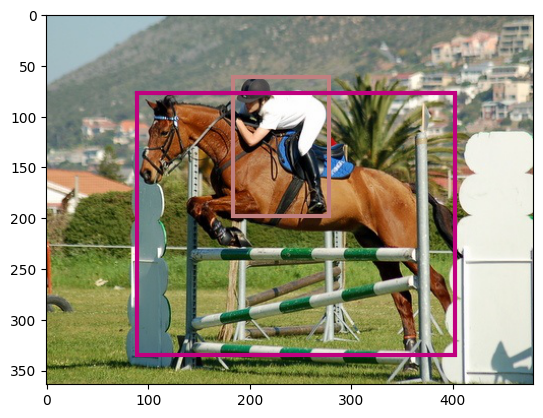

In [ ]:
#next_data = next(pascal_it)
next_data = pascal_data[1]
print(next_data)
draw_bb() ## implement here (hint: def draw_bb(img, boxes, classes, red_only=False))